# STAT 201- Review Final Exam
## Rodolfo Lourenzutti

In [162]:
library(tidyverse)
library(infer)
library(palmerpenguins)
sigma <- 
    penguins %>% 
    filter(species == 'Adelie' & !is.na(body_mass_g)) %>%
    pull(body_mass_g) %>%
    sd

# Collecting the data

# For Section 1
sample_chol <- 
    tibble(cholesterol = rnorm(43, 97, 10.38)) |>
    mutate(cholesterol = 10.38*(cholesterol-mean(cholesterol))/sd(cholesterol)+97)

# For Exercise 3
sample_printers <- read_csv("
Sample,regular, new
Printer 1, 11, 11.27, 
Printer 2, 19, 19.17, 
Printer 3, 16, 16.19, 
Printer 4, 14, 14.09, 
Printer 5, 18, 18.19, 
Printer 6, 15, 14.81, 
Printer 7, 13, 13.01, 
Printer 8, 15, 14.46, 
Printer 9, 19, 20.28, 
Printer 10, 11, 10.85,
Printer 11, 20, 19.78,
Printer 12, 10, 11.04,
Printer 13, 22, 22.15,
Printer 14, 17, 16.72,
Printer 15, 11, 11.06,
Printer 16, 18, 19.26,
Printer 17, 24, 23.98,
Printer 18, 16, 16.13,
Printer 19, 13, 12.55,
Printer 20, 21, 21.12,
Printer 21, 15, 15.25")

# For exercise 4
sample_ex4 <- read_csv("
Printer Model, regular, new
Officejet 6210,	23,	24.78
Deskjet 960cxi,	13,	12.93
Deskjet 995c,	15,	15.64
Photosmart 375,	14,	15.26
Photosmart 130,	12,	12.29
Deskjet 3820,	13,	13.99
Deskjet 5155,	21,	21.97
Deskjet 3650,	19,	20.11
Officejet 6310,	10,	10.27
Deskjet 1000cse,	24,	23.55
Photosmart 385,	16,	15.75
Deskjet 3810,	10,	9.27
Officejet 4215,	15,	14.19
Deskjet 1220cxi,	10,	10.22
Deskjet 3050A,	18,	17.70
Deskjet 1000cxi,	12,	11.84
Photosmart 145,	10,	10.52
Deskjet 3938,	20,	19.50
Deskjet 990cxi,	23,	22.54
Deskjet 3425,	23,	23.25
Officejet 500,	23,	21.81
Deskjet 3940,	11,	10.42
Officejet 725,	16,	16.18
Deskjet 970cse,	15,	15.48
Officejet 610,	18,	17.95
Deskjet 1600c,	11,	10.66
")

#  For exercise 5

contraceptive_survey_data <-
    read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data", 
         col_names = FALSE) %>% 
    select(X2, X10) %>% 
    mutate(X2 = as_factor(X2), X10 = as_factor(X10)) %>% 
    rename(education_level = X2, contraceptive = X10) %>% 
    mutate(education_level = fct_recode(education_level,
                                        "high" = "4",
                                        "high" = "3", 
                                        "low" = "2",
                                        "low" = "1"),
           contraceptive = fct_recode(contraceptive,
                                     "No" = "1",
                                     "Yes" = "2",
                                     "Yes" = "3"))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Sample
dbl (1): regular
num (1): new

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 26 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Printer Model
dbl (2): regular, new

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1473 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10

ℹ Use `spec()` to retrieve the full column specification f

## 1. Sampling Distribution

### 1.1 What is it? 

It is the distribution of the statistic's values across all possible samples from a given population. 

### 1.2 Why is it useful? 

Because it tells us how statistics behave, for example, suppose the sampling distribution of a certain statistic is given by: 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


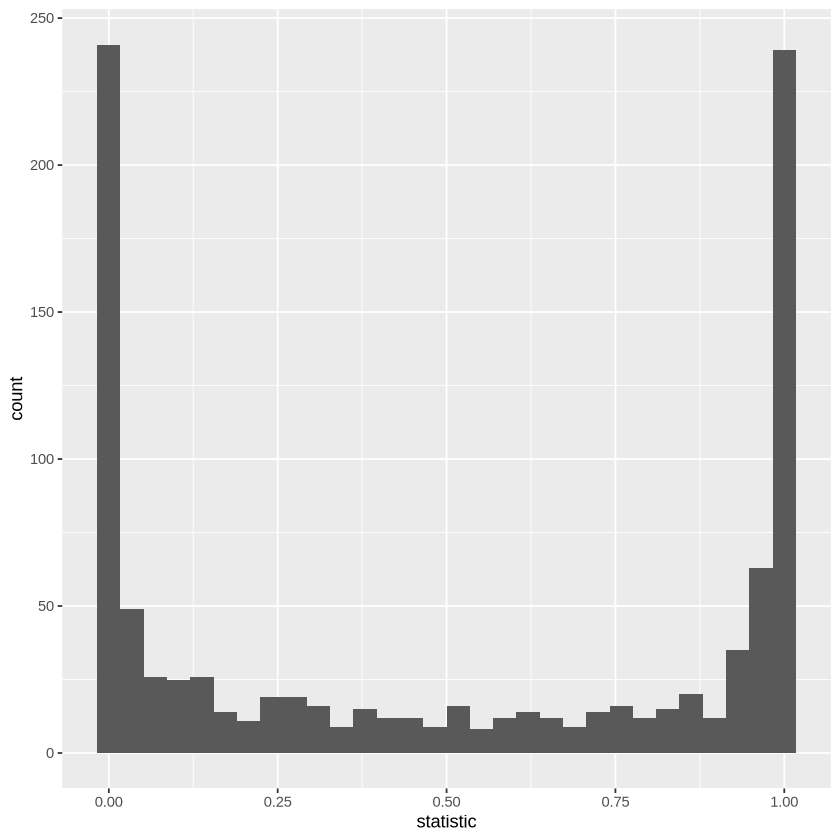

In [9]:
# Run this cell before continuing
tibble(statistic = rbeta(1000, 0.2, 0.2)) %>% 
    ggplot() + 
    geom_histogram(aes(statistic))

Then, most of our samples would give us a value of the statistic close to 0 or close to 1. There is a chance of being somewhere further away from 0 and 1, but over half of the possible samples we could select would give us a value very close to 0 or 1 (the first two and last two bars). This is very detailed information. 

**Every time you look at the sampling distribution, think of the table of all possible samples you could get and imagine you are calculating the value of the statistic of each and every sample. The sampling distribution is the distribution of these values.**

### 1.3 Standard Error

Good estimators have their sampling distribution centred around the population parameter with little spread around the parameter. A quantity that measures the variability of a distribution is the standard deviation. Because the target of the statistic is the actual population parameter, the variability of a statistic is an error. Therefore, we call the standard deviation of a statistic standard error.  

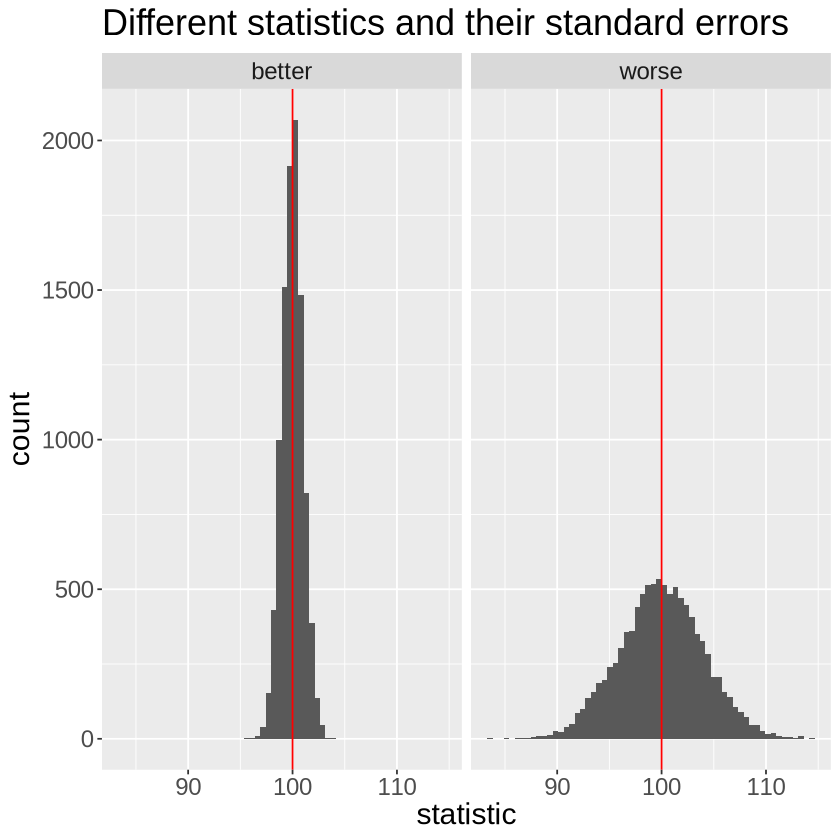

In [120]:
mu = 100
bind_rows(tibble(statistic = rnorm(10000, mu, 4), quality = 'worse'),
          tibble(statistic = rnorm(10000, mu, 1), quality = 'better')) %>%
    ggplot() + 
    geom_histogram(aes(statistic), bins = 60) + 
    geom_vline(aes(xintercept = mu), color = 'red') + 
    facet_wrap(~quality) + 
    theme(text = element_text(size = 18)) + 
    ggtitle('Different statistics and their standard errors')


### 1.4 What affects the Sampling Distribution

The sampling distribution of a statistic is affected by:

1. the statistic we are calculating;
2. the population distribution
3. the sample size (as the sample size increases, the sampling distribution tends to get narrower, i.e., we have less error [lower std. error]). 

## 2. From Sampling Distribution to Inference

In this course, we discussed two approaches for inference: point estimates, interval estimates (i.e., confidence interval), and hypothesis testing. We studied two methods for confidence interval and hypothesis testing: (1) simulation-based methods and (2) CLT-based methods. We will review both methods for different parameters in the following few sections. 

### 2.1 Case of one mean ($\mu$):
#### The average weight of Adelie Penguins

Imagine we want to estimate the body mass of Adelie penguins. 

In [121]:
adelie_penguins <- 
    penguins %>% 
    filter(species == 'Adelie' & !is.na(body_mass_g))
    

adelie_penguins %>% slice_sample(n = 10)
nrow(adelie_penguins)

species island    bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie  Dream     37.3           16.8          192               3000       
2  Adelie  Biscoe    41.6           18.0          192               3950       
3  Adelie  Dream     39.6           18.8          190               4600       
4  Adelie  Dream     39.6           18.1          186               4450       
5  Adelie  Torgersen 35.9           16.6          190               3050       
6  Adelie  Dream     40.7           17.0          190               3725       
7  Adelie  Dream     37.8           18.1          193               3750       
8  Adelie  Biscoe    34.5           18.1          187               2900       
9  Adelie  Torgersen 40.2           17.0          176               3450       
10 Adelie  Torgersen 36.7           19.3          193               3450       
   sex    year
1  female 2009
2  male   2008
3  male   2007
4  male   2008
5  female 2008
6  male   2009
7  male   2009
8  female 2008
9  female 2009
10 female 2007

[1] 151

#### 2.1.1 Confidence Interval

##### Simulation-based Approach

In the simulation-based approach, we try to learn about the sampling distribution by resampling with replacement from our original sample. These resamples are called bootstrap samples. They are of the same size as the original sample. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


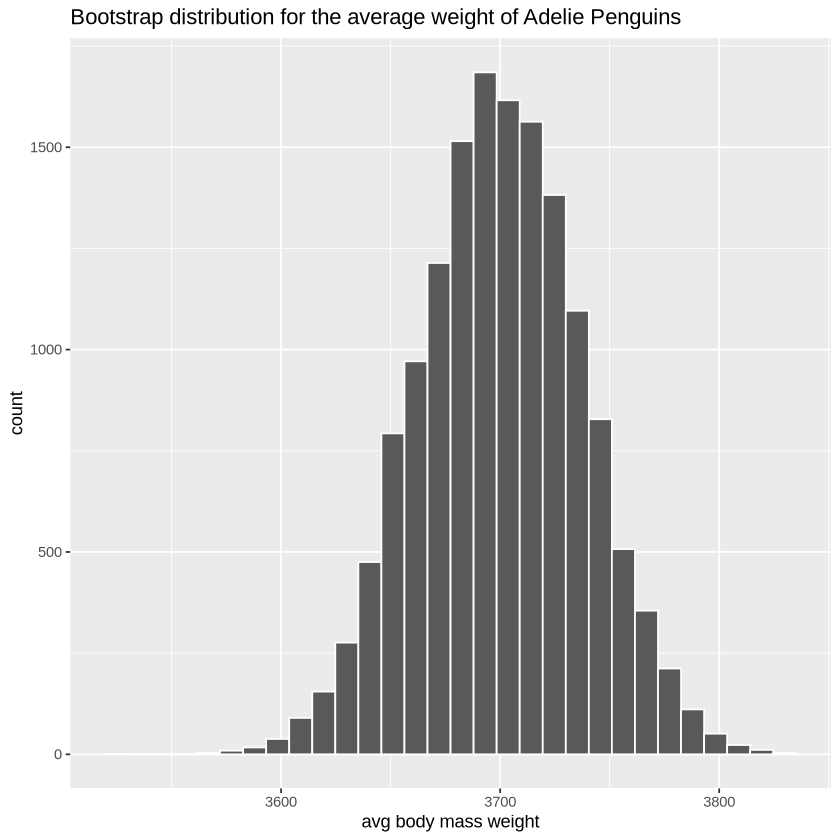

In [122]:
bootstrap_distribution <-
    adelie_penguins %>% # The original sample
    specify(response = body_mass_g) %>% # Specifies the variable of interest
    generate(reps = 15000, type = 'bootstrap') %>% # Generates 15000 re-samples 
    calculate(stat = 'mean') # calculates the mean of each resample

bootstrap_distribution %>%
    ggplot() +
    geom_histogram(aes(stat), color = 'white') + 
    xlab('avg body mass weight') + 
    ggtitle("Bootstrap distribution for the average weight of Adelie Penguins")

For this case, we have an approximation of the shape and spread of the sampling distribution of $\bar{X}$. Remember that the centre of the bootstrap distribution is the value of the original statistic, which, in this case, is the mean of the original sample. 

You can think of the generated bootstrap values as a `sample` of the bootstrap distribution. We can use this `sample` to calculate quantities of the bootstrap distribution, such as quantiles. For example, we could if we obtain the 5th-quantile and the 95th-quantile, than we would have a 90% confidence interval for the mean. Let's do that. 



In [123]:
(ci <-
    bootstrap_distribution %>%
    get_ci(level = 0.9, type = 'percentile')) # Specifies the level of the confidence interval

lower_ci upper_ci
1 3639.238 3761.921

The code above just gets the quantiles from the generated bootstrap values. You could do this manually as well: 

In [124]:
bootstrap_distribution %>%
    summarise(lower_ci = quantile(stat, 0.05),
              upper_ci = quantile(stat, 0.95))

lower_ci upper_ci
1 3639.238 3761.921

Infer also helps visualize the confidence interval over the bootstrap distribution.

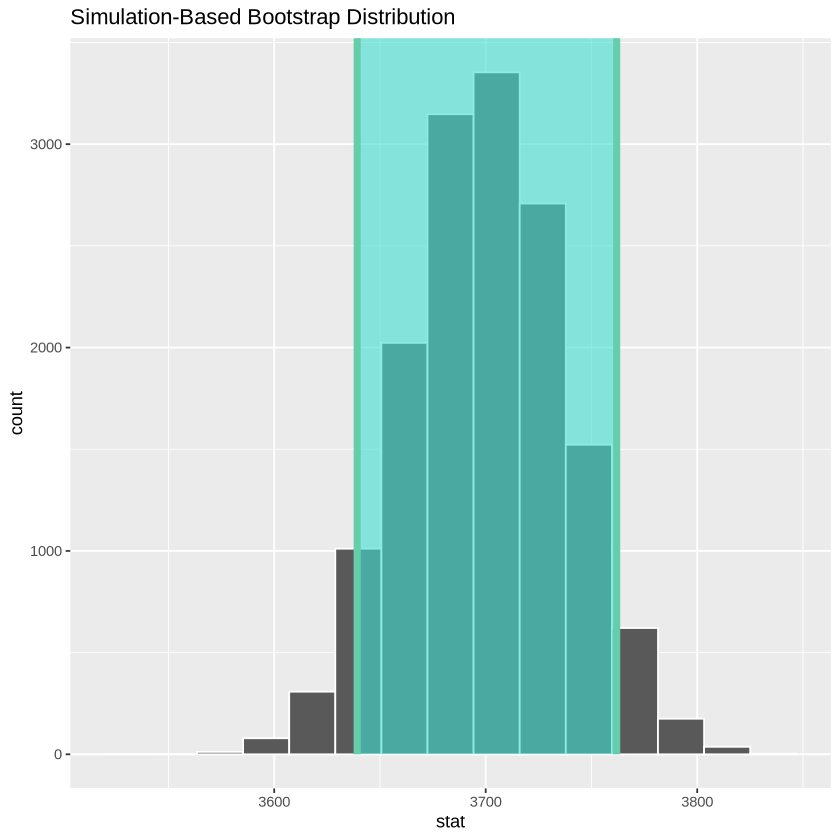

In [125]:
visualize(bootstrap_distribution) +
  shade_confidence_interval(ci)

##### Theory-based Approach
Alternatively, we could base our interval on the Central Limit Theorem (CLT).  For this to happen, we need to assume that:
Our sample is randomly and independently selected; 
Our sample is large enough;
If those assumptions are reasonable, the distribution of our statistic $\bar{X}\sim N\left(\mu, \sigma/\sqrt{n}\right)$. From here we have two cases.

#####  <span style='color: red;'>Case where we know $\sigma$</span>: 
$$
\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}\sim N(0,1)
$$


But we know that the 5th-quantile of $N(0,1)$ is given by -1.645 (`qnorm(0.05)`) and the 95th-quantile of $N(0,1)$ is 1.645 (`qnorm(0.95)`). Therefore, 

$$
-1.645 \leq \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \leq 1.645\quad\Rightarrow\quad CI(\mu; 90\%) = \bar{X}\pm 1.645\times \frac{\sigma}{\sqrt{n}}
$$

In general, when you know $\sigma$ you can calculate the $100\times C$% confidence interval using:

$$
\bar{X}\pm qnorm((1-C)/2)\times \frac{\sigma}{\sqrt{n}}
$$




In [126]:
n <- nrow(adelie_penguins)
adelie_penguins %>%
    summarise(lower_ci = mean(body_mass_g) + qnorm(0.1/2) * sigma / sqrt(n),
              upper_ci = mean(body_mass_g) - qnorm(0.1/2) * sigma / sqrt(n))

lower_ci upper_ci
1 3639.28  3762.044

#####  <span style='color: red;'>Case where we do not know $\sigma$</span>: 

Since we don't know $\sigma$, we replace $
\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}\sim N(0,1)
$ with 

$$
\frac{\bar{X} - \mu}{S/\sqrt{n}}\sim t_{n-1}
$$

Now, instead of using the `qnorm` function, we will the `qt` function.

In general, when you do not know $\sigma$ you can calculate the $100\times C$% confidence interval using:

$$
\bar{X}\pm \text{qt((1-C)/2, n-1)}\times \frac{S}{\sqrt{n}}
$$


In [127]:
n <- nrow(adelie_penguins)
adelie_penguins %>%
    summarise(lower_ci = mean(body_mass_g) + qt(0.1/2, n-1) * sd(body_mass_g) / sqrt(n),
              upper_ci = mean(body_mass_g) - qt(0.1/2, n-1) * sd(body_mass_g) / sqrt(n))

lower_ci upper_ci
1 3638.899 3762.426

The infer package also can do this for you:

In [128]:
# You don't need to know this for the final. 

sample_mean <- 
    adelie_penguins %>%
    specify(response = body_mass_g) %>%
    calculate(stat = 'mean')

adelie_penguins %>%
    specify(response = body_mass_g) %>%
    assume(distribution = 't') %>%
    get_ci(level = .9, point_estimate = sample_mean )

lower_ci upper_ci
1 3638.899 3762.426

#### 2.1.2 Hypothesis Test

Now, suppose you want to test if the average weight of Adelie penguins is less than 3800g. 

$$H_0: \mu = 3800\quad\quad vs \quad\quad H_1: \mu < 3800g$$

The first thing we need to do is define our test statistic. We could use different test statistics to test a hypothesis. In this case, using $\bar{X}$ makes sense. Note, however, that we usually want to standardize the test statistic for theory-based hypothesis tests. 

Now that our test statistic is defined, we need to study the null model. The null model is the sampling distribution of our test statistic when the null hypothesis is true. Let's understand this better. 

In the previous section, we saw that the sampling distribution of $\bar{X}$ was $N(\mu, \sigma/\sqrt{n})$. The null hypothesis states that $\mu = 3800$. Therefore, if the null hypothesis is true, $\bar{X} \sim N(3800, \sigma/\sqrt{n})$. Note how our null model doesn't depend on the true mean ($\mu$) but on the mean in the null hypothesis (3800). If it happens that $H_0$ is true, then the null model and the sampling distribution are the same thing. 

##### Simulation-based Approach

In the simulation-based approach, we try to learn about the **null model** by simulating values from it. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


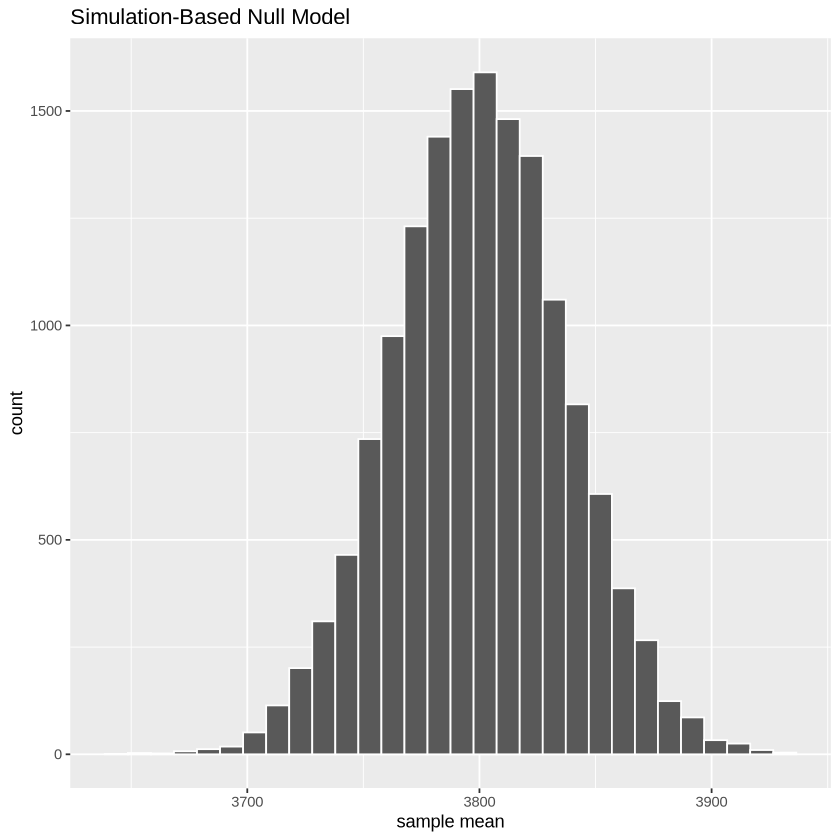

In [129]:
null_model <- 
    adelie_penguins %>% # Our original sample
    specify(response = body_mass_g) %>% # Specifies the variable of interest
    hypothesise(null = "point", mu = 3800) %>% # We use point because we are testing the equality
                                               # of one mean to the (point) value of 3800
    generate(reps = 15000, type = 'bootstrap') %>% 
    calculate(stat = 'mean')

null_model %>% 
    ggplot() + 
    geom_histogram(aes(stat), color = 'white') + 
    ggtitle('Simulation-Based Null Model') + 
    xlab('sample mean')

Now that we have our null model, we need to contrast it with the value we observed in our original sample. 

In [130]:
# This code just calculates the observed test statistic
(sample_mean <- 
    adelie_penguins %>%
    specify(response = body_mass_g) %>%
    calculate(stat = 'mean'))

stat    
1 3700.662

To contrast the null model, which is a distribution, with the observed value of the test statistic, which is a single value, we will use the strategy of the p-value. 

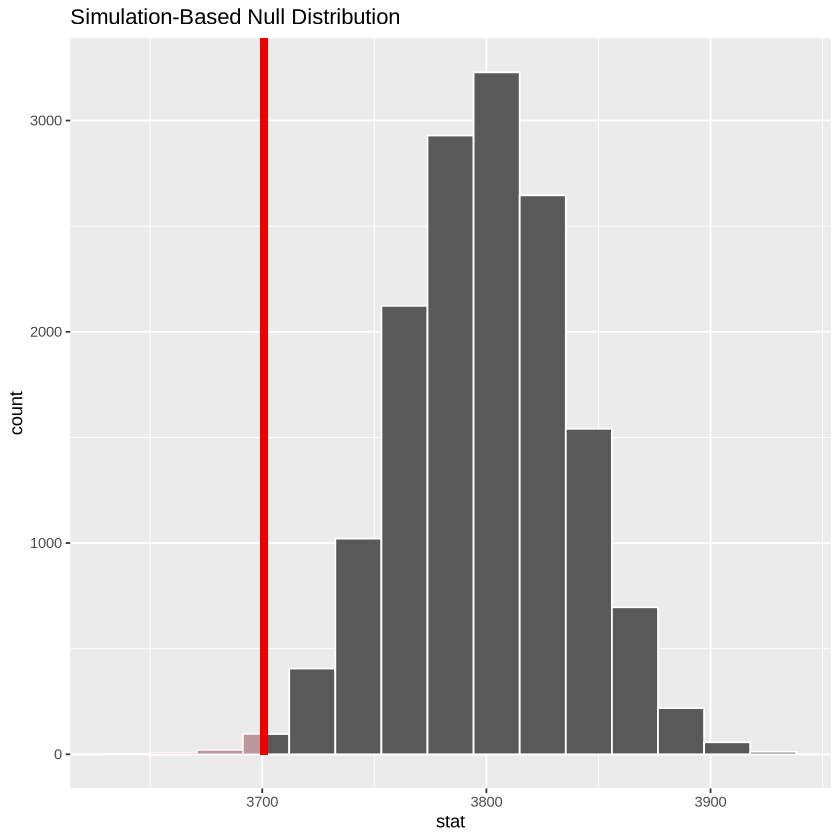

In [131]:
null_model %>%
    visualize() + 
    shade_p_value(obs_stat = sample_mean, direction = "left")

In [132]:
null_model %>%
    get_pvalue(obs_stat = sample_mean, direction = "left")

p_value    
1 0.003466667

Finally, you compare the p-value, which is 0.0038, against the significance level. If the p-value is smaller than the significance level, you reject the null hypothesis; otherwise, you don't. For example, if the significance level $\alpha = 1%$ you reject the null hypothesis, but for $\alpha = 0.1%$ you do not reject it. 

##### Theory-based Approach
Alternatively, we could use the Central Limit Theorem (CLT) to approximate the null model instead of sampling from the null model.  For this to happen, we need to assume that:
- Our sample is randomly and independently selected; 
- Our sample is large enough;

If those assumptions are reasonable, the distribution of our statistic $\bar{X}\sim N\left(\mu, \sigma/\sqrt{n}\right)$. 

As I said earlier, in theory-based hypothesis testing, we usually use the standardized form of the test statistic. It is more convenient because it always works, and we do not have to change our approach depending on whether we know $\sigma$. 

#####  <span style='color: red;'>Case where we know $\sigma$</span>: 

In this case, we will use $\frac{\bar{X} - 3800}{\sigma/\sqrt{n}}$ as our test statistic. We saw earlier that the sampling distribution of $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ is $N(0,1)$. But here, we are not after the sampling distribution; we want the null model. The null hypothesis states that $\mu = 3800$; therefore, if the null hypothesis is true, we have that:

$$
\frac{\bar{X} - 3800}{\sigma/\sqrt{n}}\sim N(0,1)
$$

From here, we need two things: 
1. Calculate the observed test statistic using the sample at hand; 
2. Contrast that with the null model ($N(0,1)$) and obtain the p-value. 

In [133]:
adelie_penguins %>%
    summarise(mu0 = 3800,
          sample_mean = mean(body_mass_g), 
          n = nrow(adelie_penguins), 
          observed_test_statistic = (sample_mean - mu0)/(sigma/sqrt(n)),
          pvalue = pnorm(observed_test_statistic))

mu0  sample_mean n   observed_test_statistic pvalue     
1 3800 3700.662    151 -2.661956               0.003884406

#####  <span style='color: red;'>Case where we do not know $\sigma$</span>: 

In this case, we will use $\frac{\bar{X} - 3800}{S/\sqrt{n}}$ as our test statistic. We saw earlier that the sampling distribution of $\frac{\bar{X} - \mu}{S/\sqrt{n}}$ is $t_{n-1}$. But here, we are not after the sampling distribution; we want the null model. The null hypothesis states that $\mu = 3800$; therefore, if the null hypothesis is true, we have that:

$$
\frac{\bar{X} - 3800}{S/\sqrt{n}}\sim t_{n-1}
$$

From here, we need two things: 
1. Calculate the observed test statistic using the sample at hand; 
2. Contrast that with the null model, $t_{n-1}$, and obtain the p-value. 

In [134]:
adelie_penguins %>%
    summarise(mu0 = 3800,
          sample_mean = mean(body_mass_g), 
          n = nrow(adelie_penguins), 
          observed_test_statistic = (sample_mean - mu0)/(sd(body_mass_g)/sqrt(n)),
          pvalue = pt(observed_test_statistic, n-1))

mu0  sample_mean n   observed_test_statistic pvalue     
1 3800 3700.662    151 -2.661956               0.004307918

Note that the value of the test statistic is the same here because I'm using $\sigma = S$ (but these are different things, which is why I was hiding this from you up to now). You can also use the `infer` package:

In [135]:
adelie_penguins %>%
    specify(response = body_mass_g) %>%
    hypothesise(null = 'point', mu = 3800) %>%
    assume(distribution = 't') %>%
    get_pvalue(obs_stat = -2.661956, direction = 'left')

p_value    
1 0.004307914

or even the `t.test`

In [136]:
broom::tidy(t.test(adelie_penguins$body_mass_g, mu = 3800, alternative = 'less'))

estimate statistic p.value     parameter conf.low conf.high method           
1 3700.662 -2.661956 0.004307918 150       -Inf     3762.426  One Sample t-test
  alternative
1 less

--------------------------

### 2.2 Case of one proportion ($p$):
#### The proportion of Adelie Penguins that weigh more than 3800g

Imagine we want to estimate the proportion of Adelie penguins that weigh more than 3700g. 

In [137]:
heavy_adelie <- 
    penguins %>% 
    filter(species == 'Adelie' & !is.na(body_mass_g)) %>%
    mutate(heavy = body_mass_g > 3800)
    

heavy_adelie %>% select(species, heavy) %>% slice_sample(n = 10)
nrow(heavy_adelie)

species heavy
1  Adelie  FALSE
2  Adelie   TRUE
3  Adelie  FALSE
4  Adelie   TRUE
5  Adelie  FALSE
6  Adelie  FALSE
7  Adelie  FALSE
8  Adelie  FALSE
9  Adelie  FALSE
10 Adelie   TRUE

[1] 151

#### 2.2.1 Confidence Interval

##### Simulation-based Approach

The workflow for the simulation-based confidence interval for proportion is very similar to the mean. 

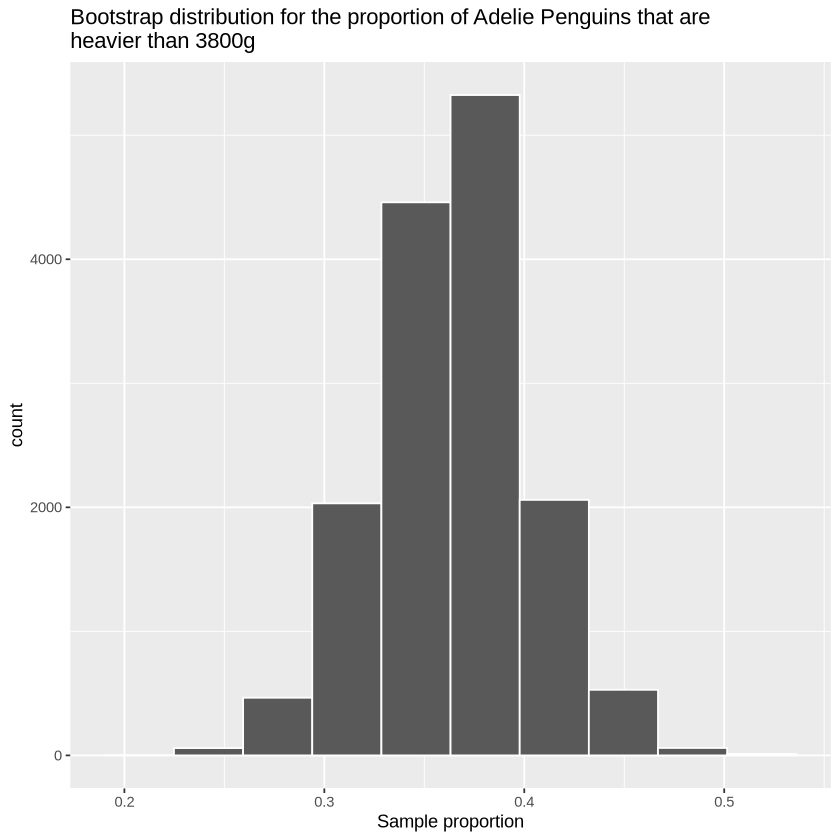

In [138]:
bootstrap_distribution <-
    heavy_adelie %>% # The original sample
    specify(response = heavy, success = 'TRUE') %>% # Specifies the variable of interest
    generate(reps = 15000, type = 'bootstrap') %>% # Generates 15000 re-samples 
    calculate(stat = 'prop') # calculates the mean of each resample

bootstrap_distribution %>%
    ggplot() +
    geom_histogram(aes(stat), color = 'white', bins = 10) + 
    xlab('Sample proportion') + 
    ggtitle("Bootstrap distribution for the proportion of Adelie Penguins that are \nheavier than 3800g")

Remember that the centre of the bootstrap sampling distribution is the sample proportion of our original sample. 

Once again, you can think of the generated bootstrap values as a `sample` of the bootstrap distribution. We can use this `sample` to calculate quantities of the bootstrap distribution, such as quantiles. For example, we could if we obtain the 2.5th-quantile and the 97.5th-quantile, than we would have a 95% confidence interval for the mean. Let's do that. 



In [139]:
(ci <-
    bootstrap_distribution %>%
    get_ci(level = 0.95, type = 'percentile')) # Specifies the level of the confidence interval

lower_ci  upper_ci 
1 0.2913907 0.4437086

Infer also helps visualize the confidence interval over the bootstrap distribution.

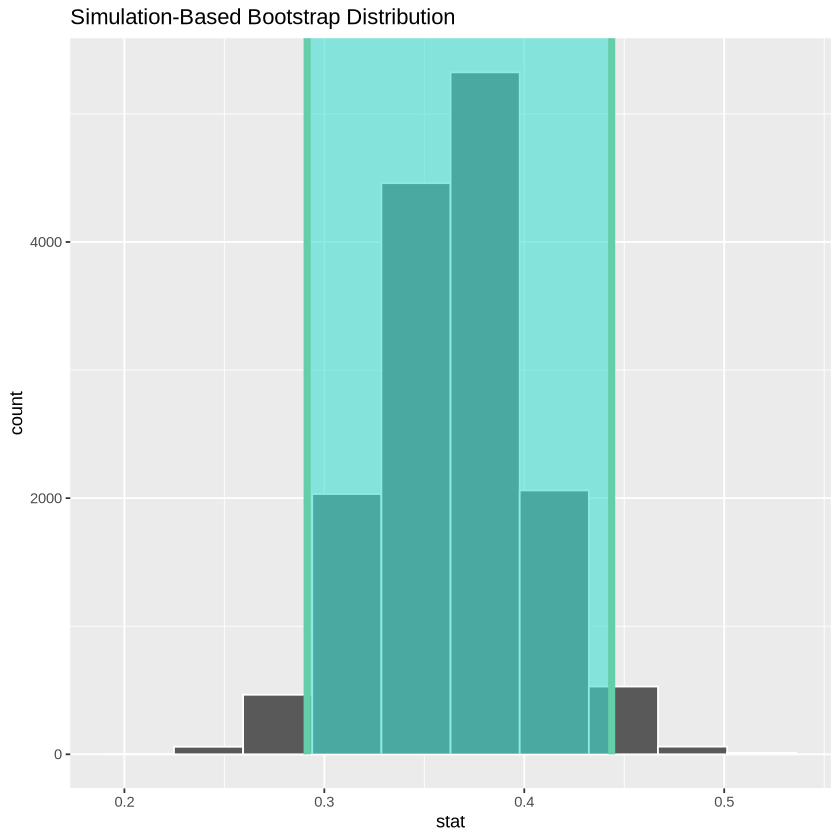

In [140]:
visualize(bootstrap_distribution, bins = 10) +
  shade_confidence_interval(ci)

##### Theory-based Approach
Alternatively, we could base our interval on the Central Limit Theorem (CLT).  For this to happen, we need to assume that:

- Our sample is randomly and independently selected; 
- $np\geq 10$ and $n(1-p)\geq 10$;

If those assumptions are reasonable, the distribution of our statistic $\hat{p}\sim N\left(p, \sqrt{\frac{p(1-p)}{n}}\right)$. From here, the $100\times C$% confidence interval is given by:

$$
\hat{p}\pm qnorm((1-C)/2)\times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$




In [141]:
n <- nrow(adelie_penguins)
heavy_adelie %>%
    summarise(phat = mean(heavy),
              lower_ci = phat + qnorm(0.05/2) * sqrt(phat*(1-phat)/n),
              upper_ci = phat - qnorm(0.05/2) * sqrt(phat*(1-phat)/n))

phat      lower_ci  upper_ci 
1 0.3642384 0.2874847 0.4409922

#### 2.2.2 Hypothesis Test

Now, suppose you want to test if the 

$$H_0: p = 0.5\quad\quad vs \quad\quad H_1: \mu \neq 0.5$$

The first thing we need to do is define our test statistic. For the simulation-based approach, we will use $\hat{p}$. However, we will standardize this test statistic for theory-based hypothesis tests. 

Now that our test statistic is defined, we need to study the null model. The null model is the sampling distribution of our test statistic when the null hypothesis is true. Let's understand this better. 

In the previous section, we saw that the sampling distribution of $\hat{p}$ was $N\left(p, \sqrt{\frac{p(1-p)}{n}}\right)$. The null hypothesis states that $p = 0.5$. Therefore, if the null hypothesis is true, $\hat{p} \sim N\left(0.5, \sqrt{\frac{0.5(1-0.5)}{n}}\right)$. Note how our null model doesn't depend on the true proportion ($p$) but on the proportion in the null hypothesis ($p=0.5$). If it happens that $H_0$ is true, then the null model and the sampling distribution are the same thing. 

##### Simulation-based Approach

In the simulation-based approach, we try to learn about the **null model** by simulating values from it. Here, we differ slightly from the approach for the sample mean.

In the case of the mean, changes in $H_0$ only change the centre of the null model. So, we could take bootstrap samples from our original sample and just adjust the centre (this is what `infer` did behind the scenes). This is not the case for the proportion. The centre and the standard deviation depend on $p$ and, therefore, are affected by $H_0$. Because of this, when testing one proportion, we will simulate the values directly from the population distribution specified by $H_0$ (note that by specifying $p$ we know exactly what the population distribution is under $H_0$), which means we will change the `type` in the `generate` function from `bootstrap` to `draw`.

In [152]:
null_model <- 
    heavy_adelie %>% # Our original sample
    specify(response = heavy, success = 'TRUE') %>% # Specifies the variable of interest and what we consider to be a success

    hypothesise(null = "point", p = 0.5) %>% # We use point because we are testing the equality
                                             # of one proportion to the (point) value of 0.5

    generate(reps = 15000, type = 'draw') %>% # In type we use draw because we are not resampling from our original sample
                                              # instead, we are sampling directly from the theoretical population (if H0 was true).
    calculate(stat = 'prop')

null_model %>% 
    visualize(bins = 12)

Now that we have our null model, we need to contrast it with the value we observed in our original sample. 

In [153]:
# This code just calculates the observed test statistic
(sample_proportion <- 
    heavy_adelie %>%
    specify(response = heavy, succes = 'TRUE') %>%
    calculate(stat = 'prop'))

stat     
1 0.3642384

To contrast the null model, which is a distribution, with the observed value of the test statistic, which is a single value, we will use the strategy of the p-value. 

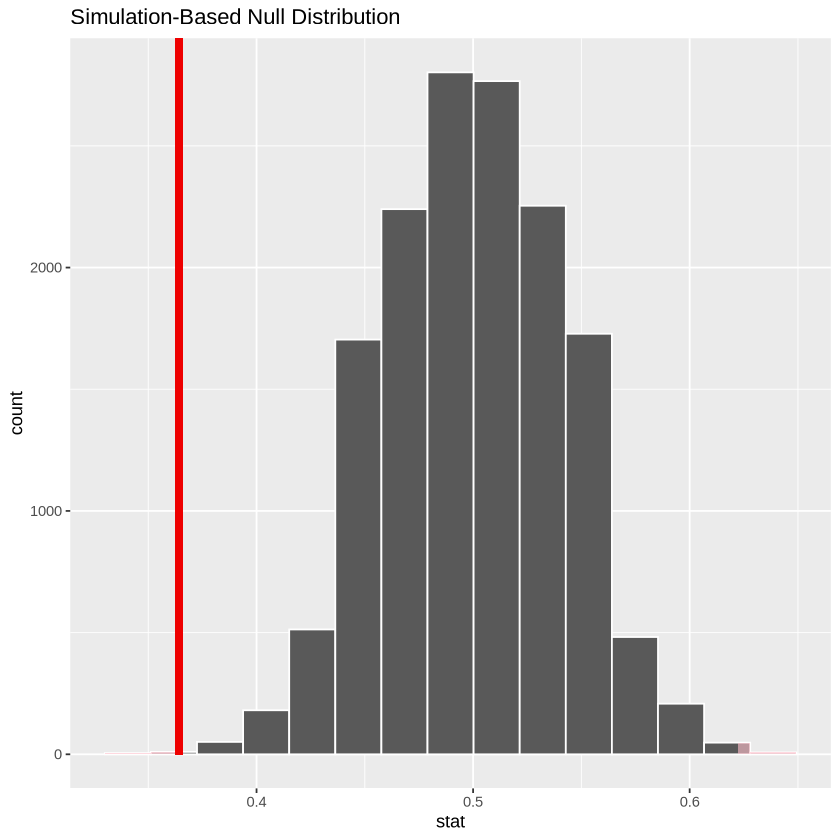

In [154]:
null_model %>%
    visualize() + 
    shade_p_value(obs_stat = sample_proportion, direction = "two.sided")

In [155]:
null_model %>%
    get_pvalue(obs_stat = sample_proportion, direction = "two.sided")

p_value    
1 0.001333333

Finally, you compare the p-value, which is 0.00133, against the significance level.

##### Theory-based Approach

As we did for the mean, we usually use the standardized test statistic for theory-based hypothesis testing. So, here, we will use:

$$
\frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}} 
$$
which in this case $p_0 = 0.5$. 

If the assumptions of CLT are reasonable, the distribution of our statistic $\frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}} \sim N\left(0, 1\right)$. 


From here, we need two things: 
1. Calculate the observed test statistic using the sample at hand; 
2. Contrast that with the null model ($N(0,1)$) and obtain the p-value. 

In [159]:
heavy_adelie %>%
    summarise(p0 = 0.5,
              phat = mean(heavy), 
              n = nrow(heavy_adelie), 
              observed_test_statistic = (phat - p0)/sqrt(p0*(1-p0)/n),
              pvalue = 2*pnorm(-abs(observed_test_statistic)))

p0  phat      n   observed_test_statistic pvalue      
1 0.5 0.3642384 151 -3.336533               0.0008483045

or even the `prop.test`

In [161]:
prop.test(
    sum(heavy_adelie$heavy), # Number of successes
    n = nrow(heavy_adelie), # Sample size
    p = 0.5, #p0
    correct = FALSE # This argument is just to match our calculations above
                    # DO NOT use it in practice
) 


	1-sample proportions test without continuity correction

data:  sum(heavy_adelie$heavy) out of nrow(heavy_adelie), null probability 0.5
X-squared = 11.132, df = 1, p-value = 0.0008483
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.291736 0.443477
sample estimates:
        p 
0.3642384 


---------------------------------

There's one last thing we should discuss in a little bit more detail. Why do we use `permute` when we are testing for equality in proportions or in means? 

### 2.3 The case of two means ($\mu_1-\mu_2$): Independent
**Average weights of Adelie penguins in Biscoe and Dream islands**

In [170]:
adelie_penguins <-
    adelie_penguins %>%
    filter(island != 'Torgersen') %>%
    mutate(island = droplevels(island))

#### 2.3.1 Confidence Interval

##### Simulation-based

Note that for confidence interval we will still use `boostrap` type. 

In [173]:
adelie_penguins %>%
    specify(formula = body_mass_g ~ island) %>%
    generate(reps = 15000, type = 'bootstrap') %>%
    calculate(stat = 'diff in means') %>%
    get_ci(level = 0.90)

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Biscoe" - "Dream", or divided in the order "Biscoe" / "Dream" for ratio-based statistics. To specify this order yourself, supply `order = c("Biscoe", "Dream")` to the calculate() function.”


lower_ci  upper_ci
1 -135.3076 175.0924

#### 2.3.2 Hypothesis testing

$$H_0: \mu_1-\mu_2=0 \quad\quad vs \quad\quad H_1: \mu_1-\mu_2 \neq 0$$

##### Simulation-based

In this scenario, it is essential to understand that Bootstrap cannot be solely relied upon as we are not trying to approximate the sampling distribution. Our goal is to approximate the null model, which assumes that both means are equal. Bootstrapping from the groups would not be sufficient as it can result in a null model where the means are not equal if the means happen to be unequal. This is because bootstrapping is used to approximate the sampling distribution and not the null model.

The `permute` option, on the other hand, provides a solution to this problem. It randomly shuffles the groups, making the group labels irrelevant, as if all observations came from the same population with the same mean. This is beneficial when we want to approximate the null model as it assumes that both means are equal. By randomly shuffling the groups, we can create new data sets with a different group assignment. This allows us to simulate the null hypothesis that there is no difference between the groups. By simulating new data sets under the null hypothesis, we can calculate how likely it is to observe the difference in the means that we see in our original data. The `permute` option can be a powerful tool in this regard, as it allows us to test the null hypothesis without making any assumptions about the underlying distributions.

In [178]:
obs_test_stat <-
    adelie_penguins %>%
    specify(formula = body_mass_g ~ island) %>%
    calculate(stat = 'diff in means')

adelie_penguins %>%
    specify(formula = body_mass_g ~ island) %>%
    hypothesise(null = 'independence') %>%
    generate(reps = 15000, type = 'permute') %>%
    calculate(stat = 'diff in means') %>%
    get_p_value(obs_stat = obs_test_stat, direction = "two.sided")

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Biscoe" - "Dream", or divided in the order "Biscoe" / "Dream" for ratio-based statistics. To specify this order yourself, supply `order = c("Biscoe", "Dream")` to the calculate() function.”
Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Biscoe" - "Dream", or divided in the order "Biscoe" / "Dream" for ratio-based statistics. To specify this order yourself, supply `order = c("Biscoe", "Dream")` to the calculate() function.”


p_value
1 0.836